In [289]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import xarray as xr
import seaborn as sns
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib
import matplotlib.pyplot as plt



In [290]:
NOAA = xr.open_dataset(r'D:\CRI_Modelling_PC\Netcdf Data\NOAA\sst.annual.mean.ltm.1982-2010.PacificCoast.nc')
BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\Rolling\Ensemble_BS_TEMPS_RollingDaily.nc")
RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\Rolling\Ensemble_RCP_TEMPS_RollingDaily.nc")
LandMask = xr.open_dataset(r'D:\CRI_Modelling_PC\Netcdf Data\mask.nc').mask
NOAA_daily = xr.open_dataset(r'D:\CRI_Modelling_PC\Netcdf Data\NOAA\sst.day.mean.ltm.1982-2010.PacificCoast.nc')

C:\ProgramData\Anaconda3\lib\site-packages\xarray\coding\times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\xarray\coding\times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: SerializationWarning: Unable t

In [291]:
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

In [292]:
BS_YM = BS.groupby('time.year').mean(dim='time').SurfaceTemp
#BS_YM = np.where(pd.DatetimeIndex(BS.time.data).year>=1982).groupby('time.year')
RCP_YM = RCP.groupby('time.year').mean(dim='time').SurfaceTemp

lat = BS.lat.data
lon = BS.lon.data

C:\ProgramData\Anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [293]:
"""fig = plt.figure(figsize=[40, 15])
fig.suptitle('Surface Temperature Past/Future Comparison', fontsize=32)
ax1 = fig.add_subplot(1,3,1,projection=crs.LambertConformal())
ax1.set_title('Baseline: 1976 - 2005', fontsize=24)
ax1.set_extent([lon[0,0], lon[-1,-1], lat[0, 0], lat[-1,-1]], crs.Geodetic())
BS_cont = ax1.pcolormesh(lon, lat, BS_YM.mean(dim='year').where(LandMask==0),
             transform=crs.PlateCarree(),
             cmap='jet', vmin=0, vmax=30)

colorbar = fig.colorbar(BS_cont, panchor=('SW'), shrink=0.7)
colorbar.set_label('Degrees Celsius', fontsize=24)
colorbar.ax.tick_params(labelsize=22)


ax2 = fig.add_subplot(1,3,2,projection=crs.LambertConformal())
ax2.set_title('RCP: 2021 - 2050', fontsize=24)
ax2.set_extent([lon[0,0], lon[-1,-1], lat[0, 0], lat[-1,-1]], crs.Geodetic())
RCP_cont = ax2.pcolormesh(lon, lat, RCP_YM.mean(dim='year').where(LandMask==0),
             transform=crs.PlateCarree(),
             cmap='jet', vmin=0, vmax=30)

colorbar = fig.colorbar(RCP_cont, panchor=('SW'), shrink=0.7)
colorbar.set_label('Degrees Celsius', fontsize=24)
colorbar.ax.tick_params(labelsize=22)

ax3 = fig.add_subplot(1,3,3,projection=crs.LambertConformal())
ax3.set_title('Difference', fontsize=24)
ax3.set_extent([lon[0,0], lon[-1,-1], lat[0, 0], lat[-1,-1]], crs.Geodetic())
Differrence_cont = ax3.pcolormesh(lon, lat, RCP_YM.mean(dim='year').where(LandMask==0) - BS_YM.mean(dim='year').where(LandMask==0),
             transform=crs.PlateCarree(),
             cmap='jet', vmin=0, vmax=2)

colorbar = fig.colorbar(Differrence_cont, panchor=('SW'), shrink=0.7)
colorbar.set_label('Degrees Celsius', fontsize=24)
colorbar.ax.tick_params(labelsize=22)

for ax in [ax1, ax2, ax3]:
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(states_provinces, edgecolor='gray')
    ax.add_feature(cfeature.BORDERS)
    ax.gridlines()

fig.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\Surface Temperature Past-Future", bbox_inches='tight')"""

'fig = plt.figure(figsize=[40, 15])\nfig.suptitle(\'Surface Temperature Past/Future Comparison\', fontsize=32)\nax1 = fig.add_subplot(1,3,1,projection=crs.LambertConformal())\nax1.set_title(\'Baseline: 1976 - 2005\', fontsize=24)\nax1.set_extent([lon[0,0], lon[-1,-1], lat[0, 0], lat[-1,-1]], crs.Geodetic())\nBS_cont = ax1.pcolormesh(lon, lat, BS_YM.mean(dim=\'year\').where(LandMask==0),\n             transform=crs.PlateCarree(),\n             cmap=\'jet\', vmin=0, vmax=30)\n\ncolorbar = fig.colorbar(BS_cont, panchor=(\'SW\'), shrink=0.7)\ncolorbar.set_label(\'Degrees Celsius\', fontsize=24)\ncolorbar.ax.tick_params(labelsize=22)\n\n\nax2 = fig.add_subplot(1,3,2,projection=crs.LambertConformal())\nax2.set_title(\'RCP: 2021 - 2050\', fontsize=24)\nax2.set_extent([lon[0,0], lon[-1,-1], lat[0, 0], lat[-1,-1]], crs.Geodetic())\nRCP_cont = ax2.pcolormesh(lon, lat, RCP_YM.mean(dim=\'year\').where(LandMask==0),\n             transform=crs.PlateCarree(),\n             cmap=\'jet\', vmin=0, vmax

In [294]:
"""fig = plt.figure(figsize=[40, 15])
fig.suptitle('Surface Temperature Past/Future Comparison', fontsize=32)
ax1 = fig.add_subplot(1,3,1,projection=crs.LambertConformal())
ax1.set_title('Historical Baseline, 1982 - 2005', fontsize=24)
ax1.set_extent([236,245,23,43], crs.Geodetic())
BS_cont = ax1.pcolormesh(lon, lat, BS_YM.mean(dim='year').where(LandMask==0),
             transform=crs.PlateCarree(),
             cmap='jet', vmin=10, vmax=30)

colorbar = fig.colorbar(BS_cont, panchor=('SW'), shrink=0.9)
colorbar.set_label('Degrees Celsius', fontsize=24)
colorbar.ax.tick_params(labelsize=22)


ax2 = fig.add_subplot(1,3,2,projection=crs.LambertConformal())
ax2.set_title('RCP 8.5, 2021 - 2050', fontsize=24)
ax2.set_extent([236,245,23,43], crs.Geodetic())
RCP_cont = ax2.pcolormesh(lon, lat, RCP_YM.mean(dim='year').where(LandMask==0),
             transform=crs.PlateCarree(),
             cmap='jet', vmin=10, vmax=30)

colorbar = fig.colorbar(RCP_cont, panchor=('SW'), shrink=0.9)
colorbar.set_label('Degrees Celsius', fontsize=24)
colorbar.ax.tick_params(labelsize=22)

ax3 = fig.add_subplot(1,3,3,projection=crs.LambertConformal())
ax3.set_title('Difference', fontsize=24)
ax3.set_extent([236,245,23,43], crs.Geodetic())
Differrence_cont = ax3.pcolormesh(lon, lat, RCP_YM.mean(dim='year').where(LandMask==0) - BS_YM.mean(dim='year').where(LandMask==0),
             transform=crs.PlateCarree(),
             cmap='Reds', vmin=1, vmax=2)

colorbar = fig.colorbar(Differrence_cont, panchor=('SW'), shrink=0.9)
colorbar.set_label('Degrees Celsius', fontsize=24)
colorbar.ax.tick_params(labelsize=22)

for ax in [ax1, ax2, ax3]:
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(states_provinces, edgecolor='gray')
    ax.add_feature(cfeature.BORDERS)
    ax.gridlines()

fig.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\Surface Temperature Past-Future Comparison", bbox_inches='tight')"""

'fig = plt.figure(figsize=[40, 15])\nfig.suptitle(\'Surface Temperature Past/Future Comparison\', fontsize=32)\nax1 = fig.add_subplot(1,3,1,projection=crs.LambertConformal())\nax1.set_title(\'Historical Baseline, 1982 - 2005\', fontsize=24)\nax1.set_extent([236,245,23,43], crs.Geodetic())\nBS_cont = ax1.pcolormesh(lon, lat, BS_YM.mean(dim=\'year\').where(LandMask==0),\n             transform=crs.PlateCarree(),\n             cmap=\'jet\', vmin=10, vmax=30)\n\ncolorbar = fig.colorbar(BS_cont, panchor=(\'SW\'), shrink=0.9)\ncolorbar.set_label(\'Degrees Celsius\', fontsize=24)\ncolorbar.ax.tick_params(labelsize=22)\n\n\nax2 = fig.add_subplot(1,3,2,projection=crs.LambertConformal())\nax2.set_title(\'RCP 8.5, 2021 - 2050\', fontsize=24)\nax2.set_extent([236,245,23,43], crs.Geodetic())\nRCP_cont = ax2.pcolormesh(lon, lat, RCP_YM.mean(dim=\'year\').where(LandMask==0),\n             transform=crs.PlateCarree(),\n             cmap=\'jet\', vmin=10, vmax=30)\n\ncolorbar = fig.colorbar(RCP_cont, p

In [295]:
"""
#Manually creating individual maps
fig = plt.figure(figsize=[15, 15])
fig.suptitle('Surface Temperature Past/Future Comparison', fontsize=32)

ax1 = fig.add_subplot(1,1,1,projection=crs.LambertConformal())
ax1.set_title('Historical Baseline, 1982 - 2005', fontsize=24)
ax1.set_extent([236,245,23,43], crs.Geodetic())
BS_cont = ax1.pcolormesh(lon, lat, BS_YM.mean(dim='year').where(LandMask==0),
             transform=crs.PlateCarree(),
             cmap='jet', vmin=10, vmax=30)

colorbar = fig.colorbar(BS_cont, panchor=('SW'), shrink=0.9)
colorbar.set_label('Degrees Celsius', fontsize=24)
colorbar.ax.tick_params(labelsize=22)

ax2 = fig.add_subplot(1,1,1,projection=crs.LambertConformal())
ax2.set_title('RCP 8.5, 2021 - 2050', fontsize=24)
ax2.set_extent([236,245,23,43], crs.Geodetic())
RCP_cont = ax2.pcolormesh(lon, lat, RCP_YM.mean(dim='year').where(LandMask==0),
             transform=crs.PlateCarree(),
             cmap='jet', vmin=10, vmax=30)

colorbar = fig.colorbar(RCP_cont, panchor=('SW'), shrink=0.9)
colorbar.set_label('Degrees Celsius', fontsize=24)
colorbar.ax.tick_params(labelsize=22)

ax3 = fig.add_subplot(1,1,1,projection=crs.LambertConformal())
ax3.set_title('Difference', fontsize=24)
ax3.set_extent([236,245,23,43], crs.Geodetic())
Differrence_cont = ax3.pcolormesh(lon, lat, RCP_YM.mean(dim='year').where(LandMask==0) - BS_YM.mean(dim='year').where(LandMask==0),
             transform=crs.PlateCarree(),
             cmap='Reds', vmin=1, vmax=2)

colorbar = fig.colorbar(Differrence_cont, panchor=('SW'), shrink=0.9)
colorbar.set_label('Degrees Celsius', fontsize=24)
colorbar.ax.tick_params(labelsize=22)


for ax in [ax1, ax2, ax3]:
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(states_provinces, edgecolor='gray')
    ax.add_feature(cfeature.BORDERS)
    ax.gridlines()

#fig.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\Difference.jpeg", bbox_inches='tight')
"""

'\n#Manually creating individual maps\nfig = plt.figure(figsize=[15, 15])\nfig.suptitle(\'Surface Temperature Past/Future Comparison\', fontsize=32)\n\nax1 = fig.add_subplot(1,1,1,projection=crs.LambertConformal())\nax1.set_title(\'Historical Baseline, 1982 - 2005\', fontsize=24)\nax1.set_extent([236,245,23,43], crs.Geodetic())\nBS_cont = ax1.pcolormesh(lon, lat, BS_YM.mean(dim=\'year\').where(LandMask==0),\n             transform=crs.PlateCarree(),\n             cmap=\'jet\', vmin=10, vmax=30)\n\ncolorbar = fig.colorbar(BS_cont, panchor=(\'SW\'), shrink=0.9)\ncolorbar.set_label(\'Degrees Celsius\', fontsize=24)\ncolorbar.ax.tick_params(labelsize=22)\n\nax2 = fig.add_subplot(1,1,1,projection=crs.LambertConformal())\nax2.set_title(\'RCP 8.5, 2021 - 2050\', fontsize=24)\nax2.set_extent([236,245,23,43], crs.Geodetic())\nRCP_cont = ax2.pcolormesh(lon, lat, RCP_YM.mean(dim=\'year\').where(LandMask==0),\n             transform=crs.PlateCarree(),\n             cmap=\'jet\', vmin=10, vmax=30)\

In [296]:
#Variable names need updating
difference = RCP_YM.mean(dim='year').where(LandMask==0) - BS_YM.mean(dim='year').where(LandMask==0)
NOAA_Masked = BS_YM[0,:,:]*0

iterLat = iterLon = 0
for x in LandMask.values:
    for y in x:
        if LandMask.values[iterLat][iterLon] == 0:
            NOAA_Masked[iterLat][iterLon] = NOAA.sst[0,iterLat,iterLon]
        else:
            NOAA_Masked[iterLat][iterLon] = None
        iterLon = iterLon+1
    iterLon = 0
    iterLat = iterLat+1
    

C:\ProgramData\Anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [297]:
"""difference = RCP_YM.mean(dim='year').where(LandMask==0) - BS_YM.mean(dim='year').where(LandMask==0)
fig2 = plt.figure(figsize=[40, 15])
fig2.suptitle('Adjusted Temperature Data', fontsize=32)

ax4 = fig2.add_subplot(1,3,1,projection=crs.LambertConformal())
ax4.set_title('NOAA: 1982-2010', fontsize=24)
ax4.set_extent([233,242,30,45], crs.Geodetic())
NOAA_Plot = ax4.pcolormesh(NOAA.lon, NOAA.lat, NOAA.sst[0,:,:],
             transform=crs.PlateCarree(),
             cmap='jet', vmin=0, vmax=30)

colorbar = fig2.colorbar(NOAA_Plot, panchor=('SW'), shrink=0.7)
colorbar.set_label('Degrees Celsius', fontsize=24)
colorbar.ax.tick_params(labelsize=22)

ax5 = fig2.add_subplot(1,3,2,projection=crs.LambertConformal())
ax5.set_title('Difference: RCP-BS', fontsize=24)
ax5.set_extent([233,242,30,45], crs.Geodetic())
Differrence_cont = ax5.pcolormesh(lon, lat, difference,
             transform=crs.PlateCarree(),
             cmap='jet', vmin=0, vmax=2)

colorbar = fig2.colorbar(Differrence_cont, panchor=('SW'), shrink=0.7)
colorbar.set_label('Degrees Celsius', fontsize=24)
colorbar.ax.tick_params(labelsize=22)

#new_difference = np.resize(difference.mean().where(difference.isnull(),1),(200,240))

#new_difference = np.reshape(new_difference,(200,240), 'F')
#adjusted_Data = NOAA.sst[0,:,:].data + new_difference

ax6 = fig2.add_subplot(1,3,3,projection=crs.LambertConformal())
ax6.set_title('Adjusted: NOAA + Differnce', fontsize=24)
ax6.set_extent([233,242,30,45], crs.Geodetic())

Adjusted_cont = ax6.pcolormesh(lon, lat, NOAA_Masked + difference,
             transform=crs.PlateCarree(),
             cmap='jet', vmin=0, vmax=30)

colorbar = fig2.colorbar(Adjusted_cont, panchor=('SW'), shrink=0.7)
colorbar.set_label('Degrees Celsius', fontsize=24)
colorbar.ax.tick_params(labelsize=22)


for ax in [ax4, ax5, ax6]:
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(states_provinces, edgecolor='gray')
    ax.add_feature(cfeature.BORDERS)
    ax.gridlines()
    
fig2.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\Adjusted Surface Temperature", bbox_inches='tight')"""

'difference = RCP_YM.mean(dim=\'year\').where(LandMask==0) - BS_YM.mean(dim=\'year\').where(LandMask==0)\nfig2 = plt.figure(figsize=[40, 15])\nfig2.suptitle(\'Adjusted Temperature Data\', fontsize=32)\n\nax4 = fig2.add_subplot(1,3,1,projection=crs.LambertConformal())\nax4.set_title(\'NOAA: 1982-2010\', fontsize=24)\nax4.set_extent([233,242,30,45], crs.Geodetic())\nNOAA_Plot = ax4.pcolormesh(NOAA.lon, NOAA.lat, NOAA.sst[0,:,:],\n             transform=crs.PlateCarree(),\n             cmap=\'jet\', vmin=0, vmax=30)\n\ncolorbar = fig2.colorbar(NOAA_Plot, panchor=(\'SW\'), shrink=0.7)\ncolorbar.set_label(\'Degrees Celsius\', fontsize=24)\ncolorbar.ax.tick_params(labelsize=22)\n\nax5 = fig2.add_subplot(1,3,2,projection=crs.LambertConformal())\nax5.set_title(\'Difference: RCP-BS\', fontsize=24)\nax5.set_extent([233,242,30,45], crs.Geodetic())\nDifferrence_cont = ax5.pcolormesh(lon, lat, difference,\n             transform=crs.PlateCarree(),\n             cmap=\'jet\', vmin=0, vmax=2)\n\ncolo

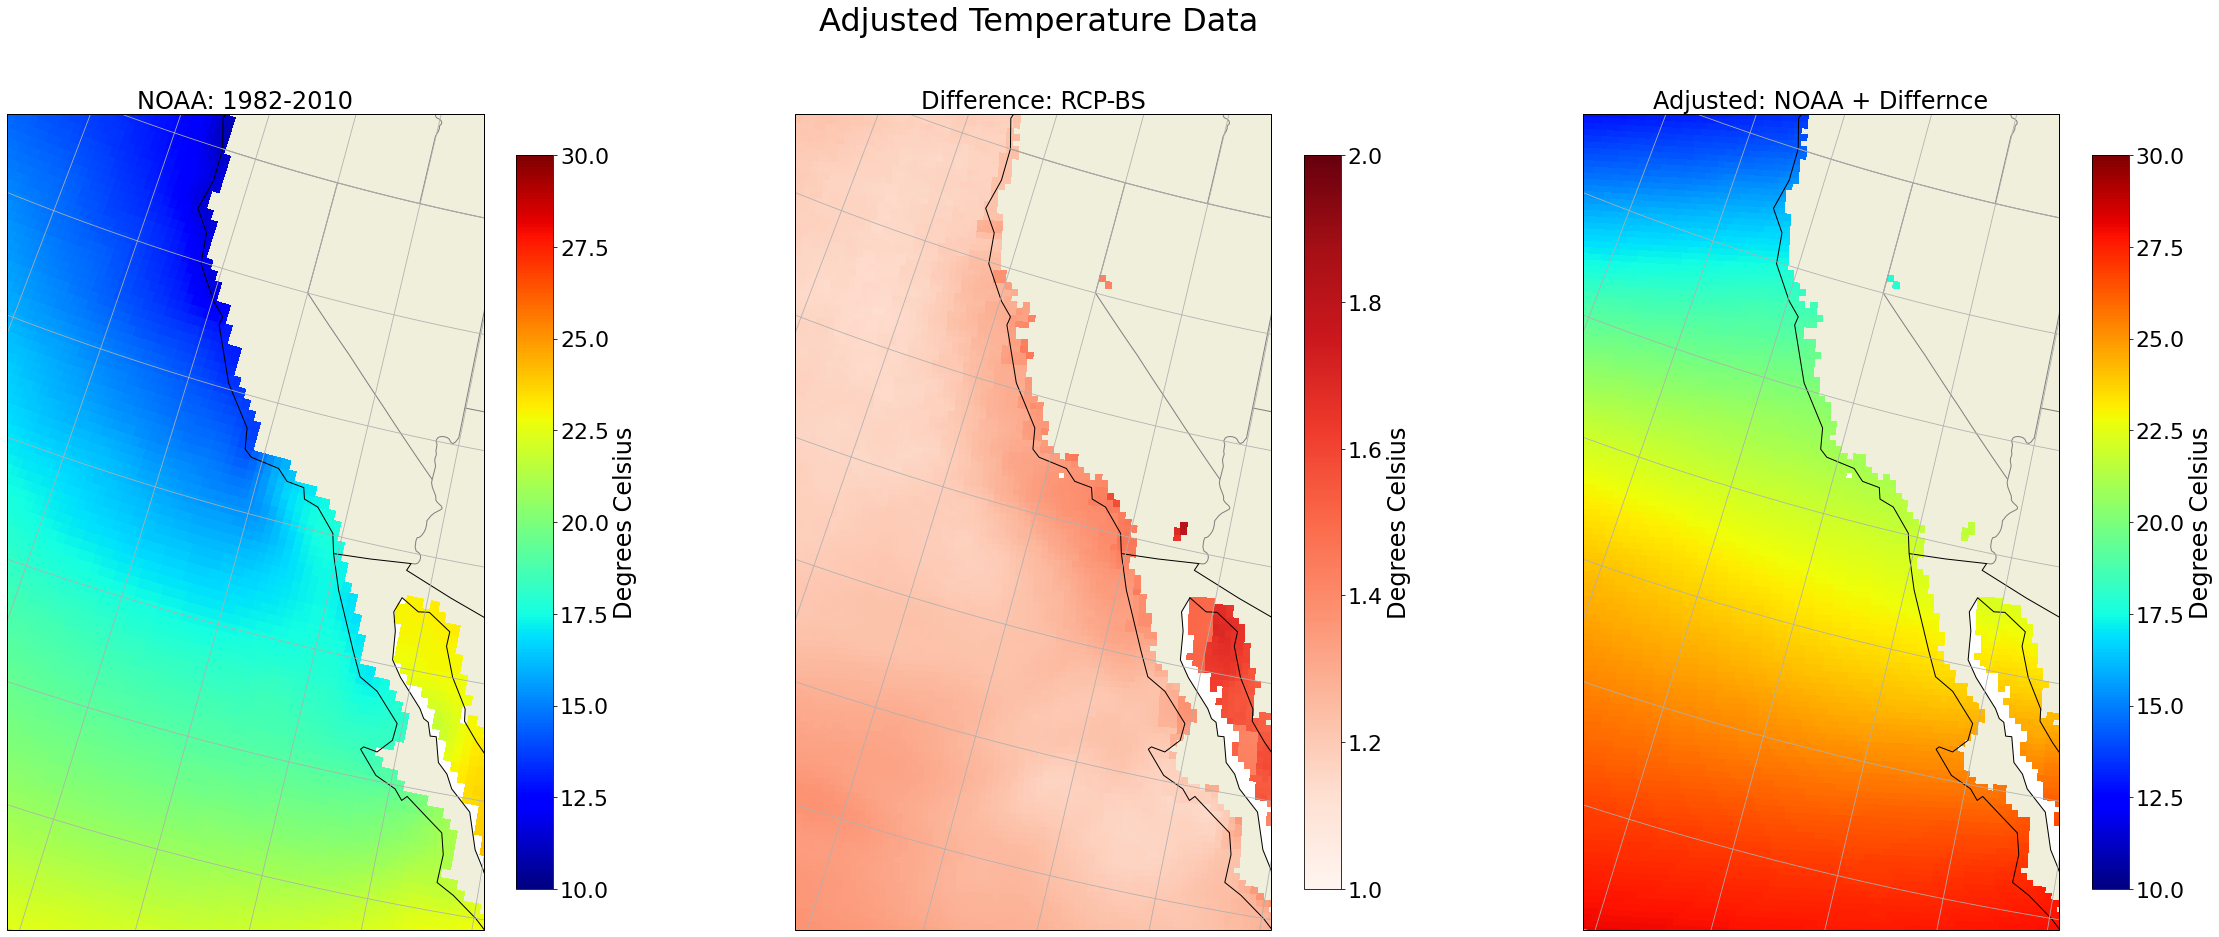

In [298]:

fig2 = plt.figure(figsize=[40, 15])
fig2.suptitle('Adjusted Temperature Data', fontsize=32)

ax4 = fig2.add_subplot(1,3,1,projection=crs.LambertConformal())
ax4.set_title('NOAA: 1982-2010', fontsize=24)
ax4.set_extent([236,245,23,43], crs.Geodetic())
NOAA_Plot = ax4.pcolormesh(NOAA.lon, NOAA.lat, NOAA.sst[0,:,:],
             transform=crs.PlateCarree(),
             cmap='jet', vmin=10, vmax=30)

colorbar = fig2.colorbar(NOAA_Plot, panchor=('SW'), shrink=0.9)
colorbar.set_label('Degrees Celsius', fontsize=24)
colorbar.ax.tick_params(labelsize=22)

ax5 = fig2.add_subplot(1,3,2,projection=crs.LambertConformal())
ax5.set_title('Difference: RCP-BS', fontsize=24)
ax5.set_extent([236,245,23,43], crs.Geodetic())
Differrence_cont = ax5.pcolormesh(lon, lat, difference,
             transform=crs.PlateCarree(),
             cmap='Reds', vmin=1, vmax=2)

colorbar = fig2.colorbar(Differrence_cont, panchor=('SW'), shrink=0.9)
colorbar.set_label('Degrees Celsius', fontsize=24)
colorbar.ax.tick_params(labelsize=22)

#new_difference = np.resize(difference.mean().where(difference.isnull(),1),(200,240))

#new_difference = np.reshape(new_difference,(200,240), 'F')
#adjusted_Data = NOAA.sst[0,:,:].data + new_difference

ax6 = fig2.add_subplot(1,3,3,projection=crs.LambertConformal())
ax6.set_title('Adjusted: NOAA + Differnce', fontsize=24)
ax6.set_extent([236,245,23,43], crs.Geodetic())

Adjusted_cont = ax6.pcolormesh(lon, lat, NOAA_Masked + difference,
             transform=crs.PlateCarree(),
             cmap='jet', vmin=10, vmax=30)

colorbar = fig2.colorbar(Adjusted_cont, panchor=('SW'), shrink=0.9)
colorbar.set_label('Degrees Celsius', fontsize=24)
colorbar.ax.tick_params(labelsize=22)


for ax in [ax4, ax5, ax6]:
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(states_provinces, edgecolor='gray')
    ax.add_feature(cfeature.BORDERS)
    ax.gridlines()
    
fig2.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\Adjusted Surface Temperature_Recolored.jpeg", bbox_inches='tight')

In [299]:
"""#Commented out for individual Maps

difference = RCP_YM.mean(dim='year').where(LandMask==0) - BS_YM.mean(dim='year').where(LandMask==0)
fig2 = plt.figure(figsize=[15, 15])
#fig2.suptitle('Adjusted Temperature Data', fontsize=32)

ax4 = fig2.add_subplot(1,1,1,projection=crs.LambertConformal())
ax4.set_title('NOAA: 1982-2010', fontsize=24)
ax4.set_extent([236,245,23,43], crs.Geodetic())
NOAA_Plot = ax4.pcolormesh(NOAA.lon, NOAA.lat, NOAA.sst[0,:,:],
             transform=crs.PlateCarree(),
             cmap='jet', vmin=10, vmax=30)

colorbar = fig2.colorbar(NOAA_Plot, panchor=('SW'), shrink=0.9)
colorbar.set_label('Degrees Celsius', fontsize=24)
colorbar.ax.tick_params(labelsize=22)

ax5 = fig2.add_subplot(1,1,1,projection=crs.LambertConformal())
ax5.set_title('Difference: RCP-BS', fontsize=24)
ax5.set_extent([236,245,23,43], crs.Geodetic())
Differrence_cont = ax5.pcolormesh(lon, lat, difference,
             transform=crs.PlateCarree(),
             cmap='Reds', vmin=1, vmax=2)

colorbar = fig2.colorbar(Differrence_cont, panchor=('SW'), shrink=0.9)
colorbar.set_label('Degrees Celsius', fontsize=24)
colorbar.ax.tick_params(labelsize=22)



ax6 = fig2.add_subplot(1,1,1,projection=crs.LambertConformal())
ax6.set_title('Adjusted: NOAA + Differnce', fontsize=24)
ax6.set_extent([236,245,23,43], crs.Geodetic())

Adjusted_cont = ax6.pcolormesh(lon, lat, NOAA_Masked + difference,
             transform=crs.PlateCarree(),
             cmap='jet', vmin=10, vmax=30)

colorbar = fig2.colorbar(Adjusted_cont, panchor=('SW'), shrink=0.9)
colorbar.set_label('Degrees Celsius', fontsize=24)
colorbar.ax.tick_params(labelsize=22)


for ax in [ax4, ax5, ax6]:
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(states_provinces, edgecolor='gray')
    ax.add_feature(cfeature.BORDERS)
    ax.gridlines()
    
fig2.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\Adjusted NOAA.jpeg", bbox_inches='tight')"""


'#Commented out for individual Maps\n\ndifference = RCP_YM.mean(dim=\'year\').where(LandMask==0) - BS_YM.mean(dim=\'year\').where(LandMask==0)\nfig2 = plt.figure(figsize=[15, 15])\n#fig2.suptitle(\'Adjusted Temperature Data\', fontsize=32)\n\nax4 = fig2.add_subplot(1,1,1,projection=crs.LambertConformal())\nax4.set_title(\'NOAA: 1982-2010\', fontsize=24)\nax4.set_extent([236,245,23,43], crs.Geodetic())\nNOAA_Plot = ax4.pcolormesh(NOAA.lon, NOAA.lat, NOAA.sst[0,:,:],\n             transform=crs.PlateCarree(),\n             cmap=\'jet\', vmin=10, vmax=30)\n\ncolorbar = fig2.colorbar(NOAA_Plot, panchor=(\'SW\'), shrink=0.9)\ncolorbar.set_label(\'Degrees Celsius\', fontsize=24)\ncolorbar.ax.tick_params(labelsize=22)\n\nax5 = fig2.add_subplot(1,1,1,projection=crs.LambertConformal())\nax5.set_title(\'Difference: RCP-BS\', fontsize=24)\nax5.set_extent([236,245,23,43], crs.Geodetic())\nDifferrence_cont = ax5.pcolormesh(lon, lat, difference,\n             transform=crs.PlateCarree(),\n          

In [300]:
sst = NOAA_daily.sst
mask = sst.where(sst.isnull(), 1)
d = sst.where((sst < 20) & (sst > 12)).count(dim='time')
Adjusted_d = sst.where((sst < 20) & (sst > 12)).count(dim='time')
difference = RCP_YM.mean(dim='year').where(LandMask==0) - BS_YM.mean(dim='year').where(LandMask==0)

difference = difference.pad({'jx':(44,45)},mode='edge').fillna(0)
for i in range(len(Adjusted_d)):
    Adjusted_d[i].fillna(0)
    #difference[i].fillna(0)
    for j in range(len(Adjusted_d)):
        Adjusted_d[i][j] = float(Adjusted_d[i][j])+(difference[i][j])
d_masked=d*mask[0,:,:]
Adjusted_d_masked = Adjusted_d*mask[0,:,:]

C:\ProgramData\Anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


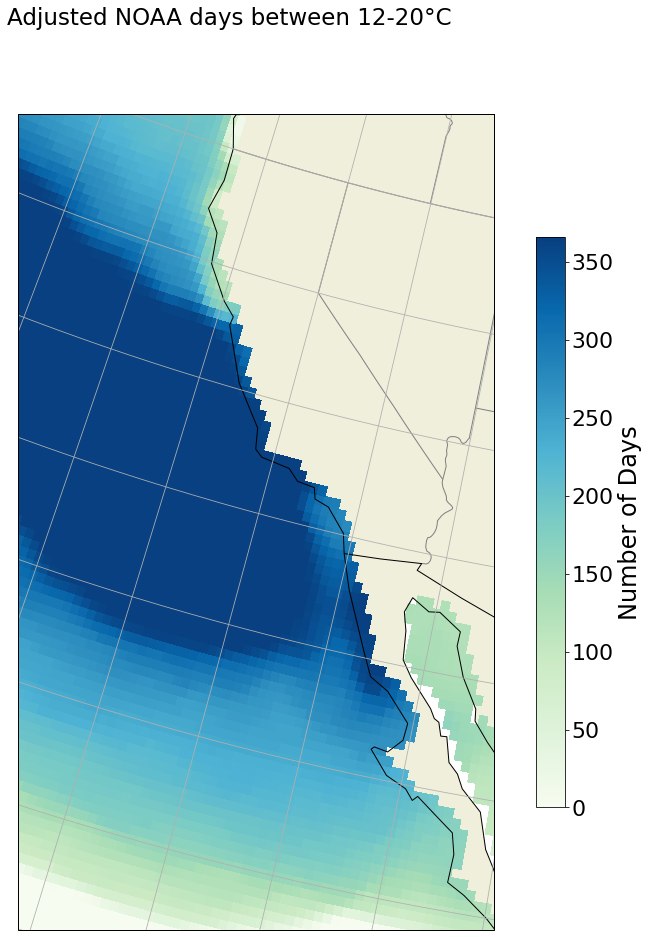

In [358]:
fig = plt.figure(figsize=[15, 15])
fig.suptitle('Adjusted NOAA days between 12-20\u00b0C', fontsize=23)

ax4 = fig.add_subplot(1,1,1,projection=crs.LambertConformal())
ax4.set_extent([236,245,23,43], crs.Geodetic())
diff_cont = ax4.pcolormesh(d.lon, d.lat, Adjusted_d_masked.data,
             transform=crs.PlateCarree(),
             cmap='GnBu')

colorbar2 = fig.colorbar(diff_cont, shrink=0.7, anchor=('SW'))
colorbar2.set_label('Number of Days', fontsize=24)
colorbar2.ax.tick_params(labelsize=22)

ax4.add_feature(cfeature.COASTLINE)
ax4.add_feature(cfeature.LAND)
ax4.add_feature(states_provinces, edgecolor='gray')
ax4.add_feature(cfeature.BORDERS)
ax4.gridlines()

fig.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\Adjusted NOAA number of days.jpeg", bbox_inches='tight')

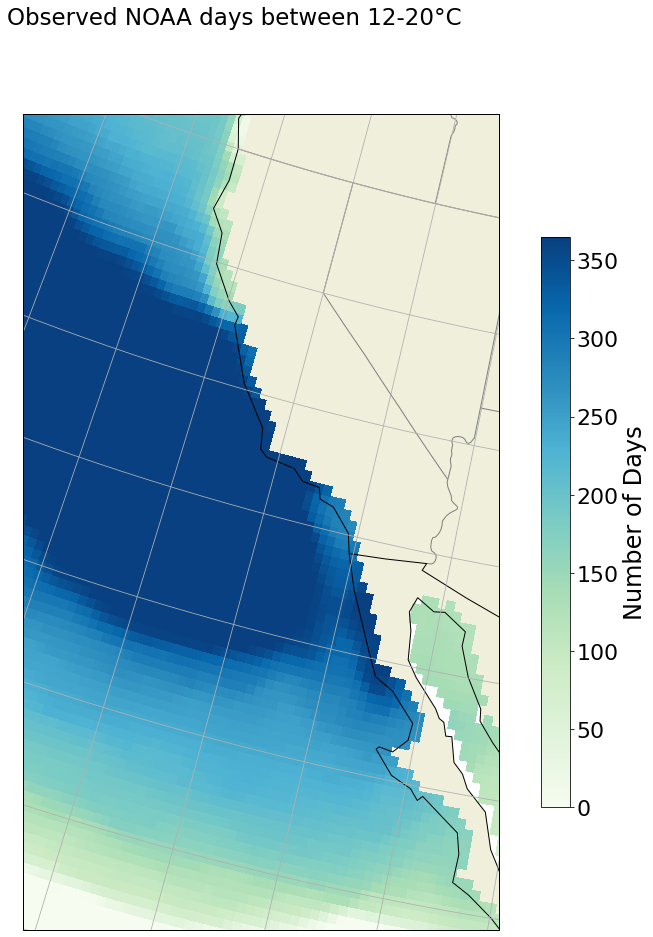

In [359]:
fig = plt.figure(figsize=[15, 15])
fig.suptitle('Observed NOAA days between 12-20\u00b0C', fontsize=23)

ax4 = fig.add_subplot(1,1,1,projection=crs.LambertConformal())
ax4.set_extent([236,245,23,43], crs.Geodetic())
diff_cont = ax4.pcolormesh(d.lon, d.lat, d_masked.data,
             transform=crs.PlateCarree(),
             cmap='GnBu')

colorbar2 = fig.colorbar(diff_cont, shrink=0.7, anchor=('SW'))
colorbar2.set_label('Number of Days', fontsize=24)
colorbar2.ax.tick_params(labelsize=22)

ax4.add_feature(cfeature.COASTLINE)
ax4.add_feature(cfeature.LAND)
ax4.add_feature(states_provinces, edgecolor='gray')
ax4.add_feature(cfeature.BORDERS)
ax4.gridlines()
fig.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\NOAA number of days.jpeg", bbox_inches='tight')

<xarray.DataArray 'sst' (time: 365, lat: 200, lon: 240)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-31 00:00:00
  * lon      (lon) float32 210.125 210.375 210.625 ... 269.375 269.625 269.875
  * lat      (lat) float32 10.125 10.375 10.625 10.875 ... 59.375 59.625 59.875
Attributes:
    long_name:     Daily Long Term Mean Sea Surface Temperature
    units:         degC
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Long Term Mean
    parent_stat:   Mean
    actual_range:  [-1.8     34.27655]

In [373]:
sst.std(dim="time")

<xarray.DataArray 'sst' (lat: 200, lon: 240)>
array([[0.7497315 , 0.7517013 , 0.75715303, ..., 0.82861584, 0.8547542 ,
        0.88264465],
       [0.7694363 , 0.7703849 , 0.7754332 , ..., 0.77315074, 0.79210913,
        0.8127467 ],
       [0.78683066, 0.7867547 , 0.7912106 , ..., 0.7246664 , 0.73708135,
        0.7516781 ],
       ...,
       [2.9683526 , 2.8776681 , 2.81107   , ..., 3.1781502 , 3.1569939 ,
        3.1321144 ],
       [3.0699728 , 2.9734535 , 2.924741  , ..., 3.2022378 , 3.1834772 ,
        3.159584  ],
       [       nan,        nan, 2.9953647 , ..., 3.2358353 , 3.214521  ,
        3.1902897 ]], dtype=float32)
Coordinates:
  * lon      (lon) float32 210.125 210.375 210.625 ... 269.375 269.625 269.875
  * lat      (lat) float32 10.125 10.375 10.625 10.875 ... 59.375 59.625 59.875

In [370]:

#NOAA = xr.open_dataset(r'D:\CRI_Modelling_PC\Netcdf Data\NOAA\sst.day.mean.PacCst.1981-2019.nc')
"""
min_Temp = 12
max_Temp = 20
lat = NOAA.lat.data
lon = NOAA.lon.data
NOAA_years = np.where((pd.DatetimeIndex(NOAA.time.data).year>=1982) & (pd.DatetimeIndex(NOAA.time.data).year<=2019))
NOAA_short = NOAA.sst[(NOAA_years[0]),:,:]
NOAA_Mask  = NOAA.sst.where(NOAA.sst.isnull(), 1)
NOAA_Count = NOAA_short.where((NOAA_short <= max_Temp) & (NOAA_short >= min_Temp)).groupby('time.year').count(dim='time')
count_Mean = NOAA_Count.mean(dim="year")
NOAA_Final = count_Mean*NOAA_Mask[0,:,:]
std_Dev = NOAA_Count.std(dim="year")*NOAA_Mask[0,:,:]
"""


std_Dev = sst.where((sst < 20) & (sst > 12)).std(dim='time.year')

ValueError: 'time.year' not found in array dimensions ('time', 'lat', 'lon')

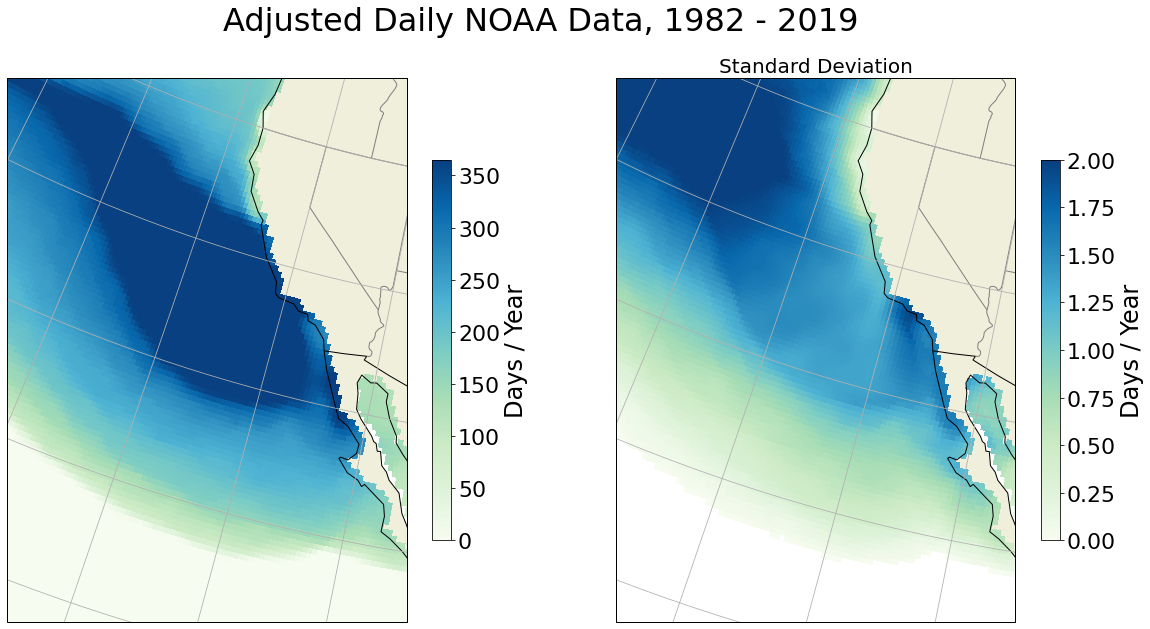

In [378]:
# Creating a figure, change name to species name
fig = plt.figure(figsize=[20,10])
#fig.suptitle('Halibut Temperature Range '+ str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C',fontsize=32)
fig.suptitle('Adjusted Daily NOAA Data, 1982 - 2019', fontsize=32)

# Plot the count_Mean data
NOAA_Plot = fig.add_subplot(1,2,1,projection=crs.LambertConformal())
#NOAA_Plot.set_title('Average number of days between ' + str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C', fontsize=20)
NOAA_Plot.set_extent([230,245,20,43], crs.Geodetic())
NOAA_Colormesh = NOAA_Plot.pcolormesh(d.lon, d.lat, Adjusted_d_masked.data,
             transform=crs.PlateCarree(),
             cmap='GnBu',vmax=365)
NOAA_Plot.add_feature(cfeature.COASTLINE)
NOAA_Plot.add_feature(cfeature.LAND)
NOAA_Plot.add_feature(cfeature.BORDERS)
NOAA_Plot.add_feature(states_provinces, edgecolor='gray')
NOAA_Plot.gridlines()

# Create a colorbar
colorbar = fig.colorbar(NOAA_Colormesh, shrink=0.7, anchor=('SW'))
colorbar.set_label('Days / Year',fontsize=24)
colorbar.ax.tick_params(labelsize=22)

# Plot the std_Dev data
std_Plot = fig.add_subplot(1,2,2,projection=crs.LambertConformal())
std_Plot.set_title('Standard Deviation', fontsize=20)
std_Plot.set_extent([230,245,20,43], crs.Geodetic())
std_Colormesh = std_Plot.pcolormesh(d.lon, d.lat, std_Dev.data,
             transform=crs.PlateCarree(),
             cmap='GnBu', vmax=2)
std_Plot.add_feature(cfeature.COASTLINE)
std_Plot.add_feature(cfeature.LAND)
std_Plot.add_feature(cfeature.BORDERS)
std_Plot.add_feature(states_provinces, edgecolor='gray')
std_Plot.gridlines()

# A new colorbar
colorbar2 = fig.colorbar(std_Colormesh, shrink=0.7, anchor=('SW'))
colorbar2.set_label('Days / Year',fontsize=24)
colorbar2.ax.tick_params(labelsize=22)

# Replace "add_name_here" with the name of your species, this will save the graph to the computer so we can have it
# for Gaby's PowerPoint
fig.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\Adjusted Daily NOAA Data.jpeg", bbox_inches='tight')